In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv('C:/Users/River Yan/Desktop/NBA Draft DS Project/NBA_Draft_2019_Stats.csv')
csv1 = pd.read_csv('C:/Users/River Yan/Desktop/NBA Draft DS Project/NBA_Draft_2018_Stats.csv')

In [8]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pick        60 non-null     int64  
 1   Team        60 non-null     object 
 2   Player      60 non-null     object 
 3   College     60 non-null     object 
 4   Yrs         60 non-null     int64  
 5   G           60 non-null     int64  
 6   G_Rank      60 non-null     int64  
 7   MP          60 non-null     int64  
 8   MP_Rank     60 non-null     int64  
 9   PTS         60 non-null     int64  
 10  PTS_Rank    60 non-null     int64  
 11  TRB         60 non-null     int64  
 12  TRB_Rank    60 non-null     int64  
 13  AST         60 non-null     int64  
 14  AST_Rank    60 non-null     int64  
 15  FG%         60 non-null     float64
 16  FG%_Rank    60 non-null     int64  
 17  3P%         60 non-null     float64
 18  3P%_Rank    60 non-null     int64  
 19  FT%         60 non-null     flo

In [9]:
csv.describe()

,Pick,Yrs,G,G_Rank,MP,MP_Rank,PTS,PTS_Rank,TRB,TRB_Rank,...,WS,WS_Rank,WS/48,WS/48_Rank,BPM,BPM_Rank,VORP,VORP_Rank,Total_Rank,Final_Rank
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,1.483333,32.550000,30.033333,645.266667,30.350000,266.466667,30.283333,102.933333,30.233333,...,0.618333,28.400000,0.027500,30.350000,-3.446667,29.916667,-0.110000,26.966667,475.933333,30.383333
std,17.464249,0.624138,24.836704,17.327324,667.898852,17.266432,311.519973,17.172200,107.072582,17.121071,...,1.165680,16.462798,0.080961,17.416946,3.880305,17.782387,0.544215,18.289542,189.994546,17.333314
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-1.300000,1.000000,-0.205000,1.000000,-15.500000,1.000000,-1.700000,1.000000,103.000000,1.000000
25%,15.750000,1.000000,8.750000,15.500000,62.750000,15.750000,18.500000,15.750000,9.750000,15.750000,...,0.000000,15.250000,-0.006500,15.750000,-4.625000,15.750000,-0.225000,14.000000,347.250000,15.750000
50%,30.500000,2.000000,32.500000,30.500000,364.500000,30.000000,101.500000,30.500000,51.000000,30.500000,...,0.200000,25.000000,0.035500,30.500000,-3.050000,30.500000,-0.050000,22.500000,463.500000,30.500000
75%,45.250000,2.000000,58.250000,44.500000,1195.750000,45.250000,502.500000,45.250000,187.250000,45.250000,...,0.950000,37.000000,0.072000,45.250000,-0.525000,43.750000,0.000000,42.250000,624.500000,45.250000
max,60.000000,2.000000,71.000000,57.000000,2143.000000,57.000000,1265.000000,56.000000,351.000000,56.000000,...,4.800000,60.000000,0.173000,60.000000,3.100000,60.000000,1.700000,60.000000,819.000000,60.000000


In [1]:
#df = pd.read_csv('C:/Users/River Yan/Desktop/NBA Draft DS Project/NBA_Draft_2019_Stats.csv')

In [2]:
#x = df['PPG']
#y = df['Final_Rank']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [3]:
#model = GaussianNB()
#model.fit(x_train, y_train)

## Team Analysis

In [36]:
csv.groupby('Team')['Final_Rank'].sum().sort_values(ascending = True)

Team
MEM      1
OKC      2
WAS      8
LAL     11
MIL     16
CHI     32
POR     33
MIA     34
CHO     42
MIN     43
TOR     49
DAL     54
UTA     61
PHO     65
CLE     68
GSW     70
ORL     70
IND     74
NYK     77
LAC     78
ATL     82
BRK     92
NOP     93
DET     98
SAS     98
BOS    126
SAC    147
PHI    199
Name: Final_Rank, dtype: int64

In [37]:
csv.groupby('Team')['Final_Rank'].mean().sort_values(ascending = True)

Team
MEM     1.000000
OKC     2.000000
WAS     8.000000
LAL    11.000000
CHO    14.000000
MIL    16.000000
CHI    16.000000
MIA    17.000000
MIN    21.500000
GSW    23.333333
ATL    27.333333
UTA    30.500000
BRK    30.666667
NOP    31.000000
BOS    31.500000
PHO    32.500000
SAS    32.666667
POR    33.000000
CLE    34.000000
ORL    35.000000
IND    37.000000
NYK    38.500000
LAC    39.000000
PHI    39.800000
SAC    49.000000
DET    49.000000
TOR    49.000000
DAL    54.000000
Name: Final_Rank, dtype: float64

In [7]:
csv.groupby(['Player', 'Team', 'Pick'])['Final_Rank'].sum().sort_values(ascending = True)

Player                    Team  Pick
Ja Morant                 MEM   2        1
Brandon Clarke            OKC   21       2
Tyler Herro               MIA   13       3
P.J. Washington           CHO   12       4
Zion Williamson           NOP   1        5
Cameron Johnson           MIN   11       6
Eric Paschall             GSW   41       7
Rui Hachimura             WAS   9        8
Jaxson Hayes              ATL   8        9
Coby White                CHI   7       10
De'Andre Hunter           LAL   4       11
Keldon Johnson            SAS   29      12
Matisse Thybulle          BOS   20      13
Darius Bazley             UTA   23      14
Cody Martin               CHO   36      15
Darius Garland            CLE   5       16
Kevin Porter Jr.          MIL   30      16
RJ Barrett                NYK   3       18
Cam Reddish               ATL   10      19
Jarrett Culver            PHO   6       20
Grant Williams            BOS   22      21
Daniel Gafford            CHI   38      22
Jalen McDaniels  

## Correlation 

In [45]:
csv.corr()

,Pick,Yrs,G,G_Rank,MP,MP_Rank,PTS,PTS_Rank,TRB,TRB_Rank,...,WS,WS_Rank,WS/48,WS/48_Rank,BPM,BPM_Rank,VORP,VORP_Rank,Total_Rank,Final_Rank
Pick,1.000000,-0.428390,-0.687122,0.663216,-0.734012,0.723083,-0.721053,0.733381,-0.692589,0.702779,...,-0.367453,0.277425,-0.275661,0.217288,-0.396701,0.286119,0.092019,-0.139398,0.681897,0.681156
Yrs,-0.428390,1.000000,0.621098,-0.669160,0.572449,-0.667090,0.530052,-0.677182,0.554911,-0.661043,...,0.346378,-0.296258,0.376176,-0.372877,0.171835,-0.058922,-0.040419,0.117249,-0.701086,-0.681697
G,-0.687122,0.621098,1.000000,-0.984256,0.897734,-0.945929,0.804005,-0.923691,0.863300,-0.918691,...,0.493514,-0.425062,0.320679,-0.267593,0.224503,-0.105391,-0.127490,0.291338,-0.796784,-0.801021
G_Rank,0.663216,-0.669160,-0.984256,1.000000,-0.888623,0.951144,-0.798456,0.928517,-0.849347,0.919469,...,-0.509560,0.447246,-0.356481,0.311043,-0.217427,0.091598,0.102308,-0.283829,0.821779,0.822076
MP,-0.734012,0.572449,0.897734,-0.888623,1.000000,-0.947114,0.958566,-0.933377,0.915004,-0.899011,...,0.462514,-0.342200,0.222185,-0.161676,0.199944,-0.101770,-0.186956,0.301834,-0.813257,-0.827718
MP_Rank,0.723083,-0.667090,-0.945929,0.951144,-0.947114,1.000000,-0.889814,0.985217,-0.892312,0.957890,...,-0.463650,0.389101,-0.328791,0.265550,-0.213137,0.064241,0.177326,-0.337126,0.873037,0.873719
PTS,-0.721053,0.530052,0.804005,-0.798456,0.958566,-0.889814,1.000000,-0.907453,0.891228,-0.854343,...,0.520246,-0.352158,0.240973,-0.186424,0.232260,-0.154762,-0.076663,0.221825,-0.813068,-0.817669
PTS_Rank,0.733381,-0.677182,-0.923691,0.928517,-0.933377,0.985217,-0.907453,1.000000,-0.897524,0.961586,...,-0.491957,0.414234,-0.375886,0.305112,-0.259657,0.115085,0.133611,-0.304553,0.902617,0.899556
TRB,-0.692589,0.554911,0.863300,-0.849347,0.915004,-0.892312,0.891228,-0.897524,1.000000,-0.949023,...,0.619054,-0.498984,0.340286,-0.301029,0.275442,-0.190342,-0.000855,0.177954,-0.839650,-0.852127
TRB_Rank,0.702779,-0.661043,-0.918691,0.919469,-0.899011,0.957890,-0.854343,0.961586,-0.949023,1.000000,...,-0.568963,0.505322,-0.432711,0.377870,-0.281567,0.142359,0.060829,-0.247335,0.905749,0.904650


In [47]:
corr = csv.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## 2018 Data

In [6]:
csv1.groupby('Tm')['Total_Rank'].mean().sort_values(ascending = True)

Tm
CLE    10.000000
ATL    10.250000
DAL    11.000000
MIL    13.000000
MEM    17.000000
DET    20.000000
NYK    22.000000
SAC    22.500000
LAC    24.500000
HOU    25.000000
CHI    26.500000
CHO    27.500000
BOS    29.000000
LAL    30.500000
IND    31.000000
MIN    31.000000
PHI    34.333333
POR    35.000000
WAS    35.000000
DEN    37.000000
PHO    37.500000
BRK    38.000000
ORL    38.333333
SAS    41.500000
UTA    46.000000
GSW    48.000000
NOP    53.000000
OKC    54.500000
Name: Total_Rank, dtype: float64

In [13]:
csv1.groupby(['Player', 'Tm', 'Pk'])['Total_Rank'].sum().sort_values(ascending = True)

Player                   Tm   Pk
Trae Young               DAL  5      1
Luka Dončić              ATL  3      2
Shai Gilgeous-Alexander  CHO  11     2
Mikal Bridges            PHI  10     4
Deandre Ayton            PHO  1      5
Jaren Jackson Jr.        MEM  4      6
Kevin Huerter            ATL  19     7
Miles Bridges            LAC  12     8
Jalen Brunson            DAL  33     9
Collin Sexton            CLE  8     10
Devonte' Graham          ATL  34    11
Mitchell Robinson        NYK  36    12
Donte DiVincenzo         MIL  17    13
Landry Shamet            PHI  26    14
Wendell Carter Jr.       CHI  7     15
Michael Porter Jr.       DEN  14    16
Troy Brown Jr.           WAS  15    17
Aaron Holiday            IND  23    18
Marvin Bagley III        SAC  2     19
Bruce Brown              DET  42    20
Omari Spellman           ATL  30    21
Mo Bamba                 ORL  6     22
Josh Okogie              MIN  20    23
Shake Milton             DAL  54    23
De'Anthony Melton        HOU  4

## Merging Data

In [28]:
csv2 = csv.groupby(['Player', 'Team', 'Pick'])['Total_Rank'].sum().sort_values(ascending = True)

In [33]:
csv3 = csv1.groupby(['Player', 'Team', 'Pick'])['Total_Rank'].sum().sort_values(ascending = True)

In [41]:
csv4 = pd.merge(csv2, csv3, on='Team')

In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [45]:
csv4.groupby('Team').mean()

,Total_Rank_x,Total_Rank_y
Team,,
ATL,27.333333,10.250000
BOS,31.500000,29.000000
BRK,30.666667,38.000000
CHI,16.000000,26.500000
CHO,14.000000,27.500000
CLE,34.000000,10.000000
DAL,54.000000,11.000000
DET,49.000000,20.000000
GSW,23.333333,48.000000


In [47]:
sum_column = csv4["Total_Rank_x"] + csv4["Total_Rank_y"]
csv4["Total_Rank_both"] = sum_column

In [54]:
csv4.groupby("Team").mean().sort_values('Total_Rank_both', ascending = True)

,Total_Rank_x,Total_Rank_y,Total_Rank_both
Team,,,
MEM,1.000000,17.000000,18.000000
MIL,16.000000,13.000000,29.000000
ATL,27.333333,10.250000,37.583333
CHO,14.000000,27.500000,41.500000
LAL,11.000000,30.500000,41.500000
CHI,16.000000,26.500000,42.500000
WAS,8.000000,35.000000,43.000000
CLE,34.000000,10.000000,44.000000
MIN,21.500000,31.000000,52.500000


## K-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('C:/Users/River Yan/Desktop/NBA Draft DS Project/NBA_Draft_2019_Stats.csv')

In [4]:
x = df.iloc[:, [0,5,7,23,29,33]].values

In [5]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 1 1 1 1 1 1 0 1 1 1 1 1 2 0 2 0 2 2 1 1 0 0 2 0 2 2 1 2 0 2 2 2 0 2 0 2
 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
kmeans3.cluster_centers_

array([[ 2.26363636e+01,  5.12727273e+01,  8.63363636e+02,
         7.14545455e+00,  1.14545455e+00, -2.60909091e+00],
       [ 1.28000000e+01,  6.11333333e+01,  1.63760000e+03,
         1.18466667e+01,  1.32666667e+00, -2.48666667e+00],
       [ 4.08529412e+01,  1.38823529e+01,  1.36911765e+02,
         2.88823529e+00,  1.35294118e-01, -4.14117647e+00]])

### X: Pick, Y: Games Played

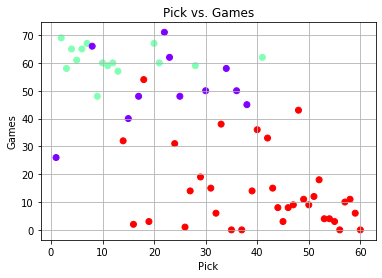

In [46]:
plt.scatter(x[:,0], x[:, 1], c=y_kmeans3, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('Games')
plt.title('Pick vs. Games')
plt.show()

In [28]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[4 1 1 1 1 1 1 2 2 1 2 1 1 0 4 3 4 0 3 2 2 2 2 0 4 3 3 2 0 2 3 3 0 4 3 4 3
 4 3 0 1 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3]


In [29]:
kmeans5.cluster_centers_

array([[ 3.33333333e+01,  3.37777778e+01,  3.51222222e+02,
         3.86666667e+00,  4.00000000e-01, -2.87777778e+00],
       [ 1.03000000e+01,  6.24000000e+01,  1.78630000e+03,
         1.30100000e+01,  9.50000000e-01, -3.12000000e+00],
       [ 1.91111111e+01,  6.02222222e+01,  1.24355556e+03,
         8.22222222e+00,  1.90000000e+00, -1.61111111e+00],
       [ 4.35600000e+01,  6.72000000e+00,  5.97600000e+01,
         2.53600000e+00,  4.00000000e-02, -4.59600000e+00],
       [ 2.37142857e+01,  4.50000000e+01,  7.15142857e+02,
         7.45714286e+00,  8.42857143e-01, -2.90000000e+00]])

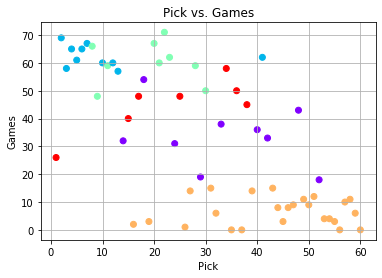

In [44]:
plt.scatter(x[:,0], x[:, 1], c=y_kmeans5, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('Games')
plt.title('Pick vs. Games')
plt.show()

### X: Pick, Y: Minutes Played

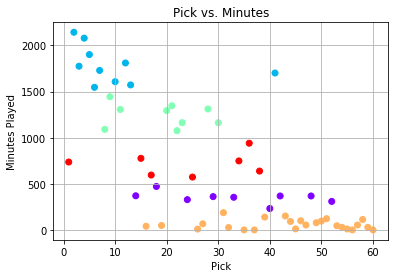

In [41]:
plt.scatter(x[:,0], x[:, 2], c=y_kmeans5, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('Minutes Played')
plt.title('Pick vs. Minutes')
plt.show()

### X: Pick, Y: PPG 

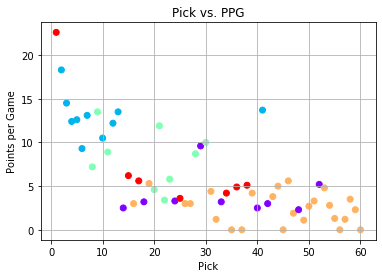

In [42]:
plt.scatter(x[:,0], x[:, 3], c=y_kmeans5, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('Points per Game')
plt.title('Pick vs. PPG')
plt.show()

### X: Pick, Y: Win Shares

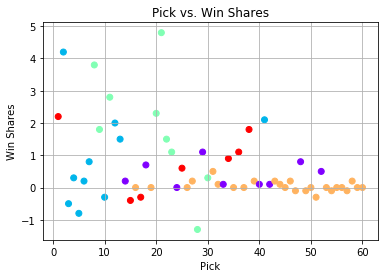

In [43]:
plt.scatter(x[:,0], x[:, 4], c=y_kmeans5, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('Win Shares')
plt.title('Pick vs. Win Shares')
plt.show()

### X: Pick, Y: Plus/Minus

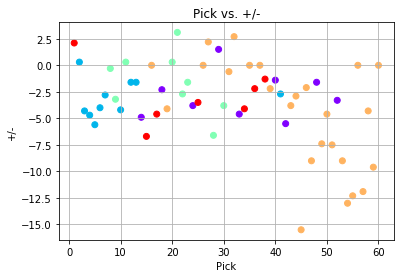

In [50]:
plt.scatter(x[:,0], x[:, 5], c=y_kmeans5, cmap='rainbow')
plt.grid()
plt.xlabel('Pick')
plt.ylabel('+/-')
plt.title('Pick vs. +/-')
plt.show()

## Feature Importance 

In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [90]:
data = pd.read_csv('C:/Users/River Yan/Desktop/NBA Draft DS Project/NBA_Draft_2019_Stats.csv')
X = data.iloc[:,4:29] #no string columns
y = data.iloc[:,0]    
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(10,'Score')) 

       Column         Score
3          MP  40788.165720
5         PTS  21487.253940
9         AST   7005.829178
7         TRB   6571.318653
1           G   1118.121352
2      G_Rank    589.809101
22  TRPG_Rank    582.509162
18   MPG_Rank    581.075783
4     MP_Rank    579.560132
12   FG%_Rank    576.442912
